In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox



In [3]:
dt = pd.read_csv('Data/arma.csv')

In [4]:
dt

,date,y1,y2,y3
0,1,-1.851416,-0.308855,0.228167
1,2,-1.534501,-0.527057,0.135259
2,3,-2.600396,-2.101098,1.428202
3,4,-2.636762,-2.586984,3.623135
4,5,-0.147869,-1.778408,4.435423
...,...,...,...,...
295,296,0.079805,2.360154,1.166177
296,297,1.371804,0.219785,0.083518
297,298,0.413863,-0.055302,-1.995681
298,299,-1.246136,-1.536113,-1.325695


In [5]:
acf_y1=acf(dt['y1'], nlags=20)
pacf_y1=pacf(dt['y1'], nlags=20)

Text(0.5, 1.0, '偏標本自己相関（y1）')

/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24049 (\N{CJK UNIFIED IDEOGRAPH-5DF1}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/eve

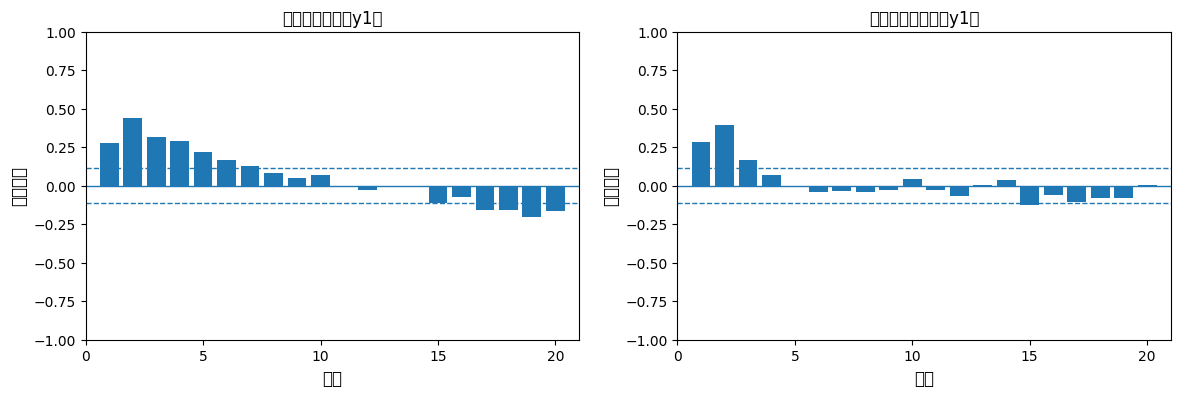

In [6]:
acf_y1=acf(dt['y1'], nlags=20)
pacf_y1=pacf(dt['y1'], nlags=20)

y=[acf_y1,pacf_y1]
fig,ax=plt.subplots(1,2,figsize=[14,4])
for i in range(2):   
    ax[i].bar(range(1,21),y[i][1:21])
    ax[i].set_xlim(0,21)
    ax[i].set_ylim(-1,1)
    ax[i].set_xticks([0,5,10,15,20])
    ax[i].hlines(0,0,21,linewidth=1)
    ax[i].hlines([1.96/np.sqrt(dt.shape[0]),-1.96/np.sqrt(dt.shape[0])],0,21,linestyles='dashed',linewidth=1)
    ax[i].set_xlabel('ラグ',fontsize=12)
    ax[i].set_ylabel('自己相関',fontsize=12)
ax[0].set_title('標本自己相関（y1）')
ax[1].set_title('偏標本自己相関（y1）')

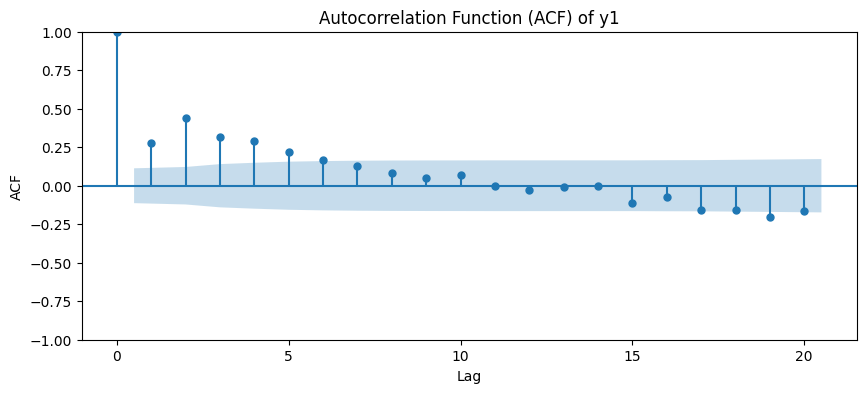

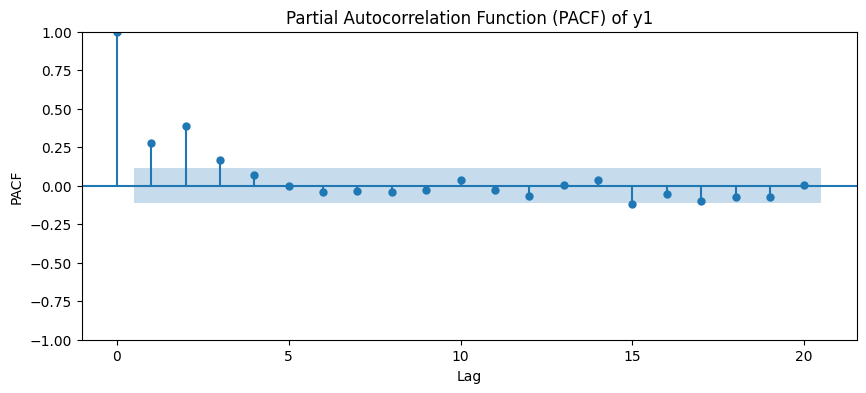

In [7]:
# y1の自己相関と偏自己相関をプロット
lags = 20

# 自己相関(ACF)
plt.figure(figsize=(10, 4))
plot_acf(dt['y1'], lags=lags, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of y1')
plt.xlabel('Lag')
plt.ylabel('ACF')

# 偏自己相関(PACF)
plt.figure(figsize=(10, 4))
plot_pacf(dt['y1'], lags=lags, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of y1')
plt.xlabel('Lag')
plt.ylabel('PACF')

plt.show()

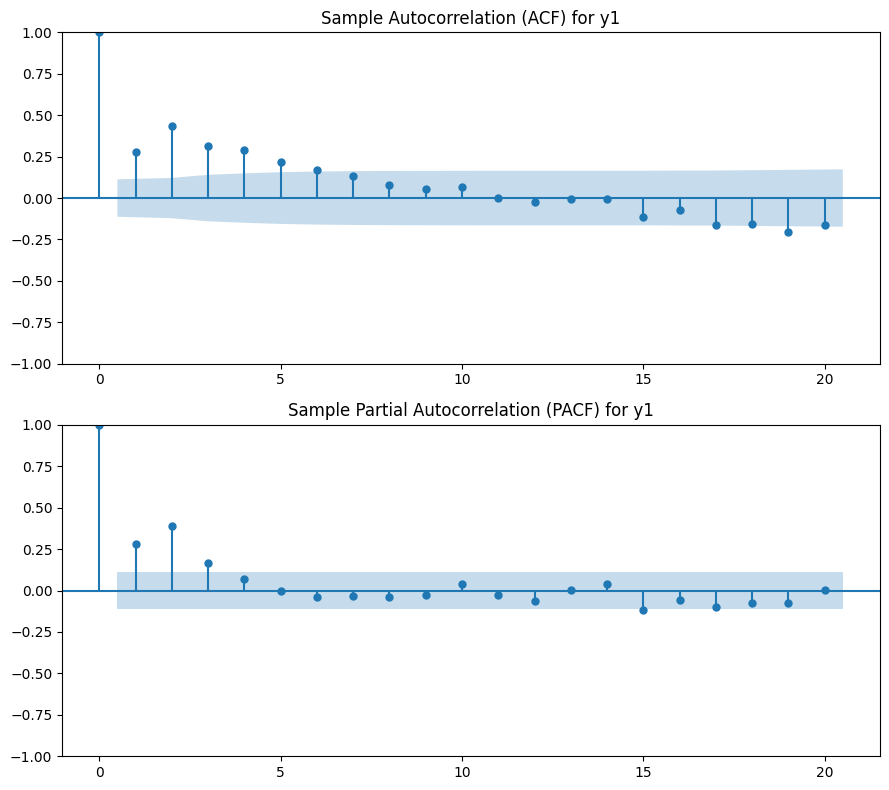

In [8]:
# 標本自己相関と標本偏自己相関をプロット
fig, axs = plt.subplots(2, figsize=(9, 8))

plot_acf(dt['y1'], ax=axs[0], lags=20)
plot_pacf(dt['y1'], ax=axs[1], lags=20, method='ywm')  # Yule-Walker法を使用してPACFを計算

# グラフを表示
axs[0].set_title('Sample Autocorrelation (ACF) for y1')
axs[1].set_title('Sample Partial Autocorrelation (PACF) for y1')
plt.tight_layout()
plt.show()

- 上記プロットの結果から、AR(2)が最有力で、ARMAの可能性もある
- AR(2)、ARMA(1,1)、ARMA(2,1)、ARMA(1,2)をモデル候補とする（ARMA(2,2)は定常性の過程が成り立たないとして却下された）

In [9]:
# AR, ARMAモデルの定義と推定
models = [
    ('AR(2)', ARIMA(dt['y1'], order=(2, 0, 0)).fit()),
    ('ARMA(1,1)', ARIMA(dt['y1'], order=(1, 0, 1)).fit()),
    ('ARMA(2,1)', ARIMA(dt['y1'], order=(2, 0, 1)).fit()),
    ('ARMA(1,2)', ARIMA(dt['y1'], order=(1, 0, 2)).fit()),
    ('ARMA(2,2)', ARIMA(dt['y1'], order=(1, 1, 1)).fit())
]

# AIC, SICの値をデータフレームに格納
results = []
for name, model in models:
    results.append({
        'Model': name,
        'AIC': model.aic,
        'SIC': model.bic
    })

df_results = pd.DataFrame(results)
df_results = df_results.set_index('Model').T
df_results

Model,AR(2),"ARMA(1,1)","ARMA(2,1)","ARMA(1,2)","ARMA(2,2)"
AIC,907.179314,913.461881,898.477200,897.621783,907.733345
SIC,921.994444,928.277011,916.996112,916.140696,918.834676


In [24]:
# 残差を取得
residuals = models[3][1].resid

# Ljung-Box検定を実施
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)

# 結果を表示
print("Ljung-Box Test Results:")
print(ljung_box_result)

Ljung-Box Test Results:
     lb_stat  lb_pvalue
10  1.489449   0.998968


Text(0.5, 1.0, '偏標本自己相関（y1）')

/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24049 (\N{CJK UNIFIED IDEOGRAPH-5DF1}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/eve

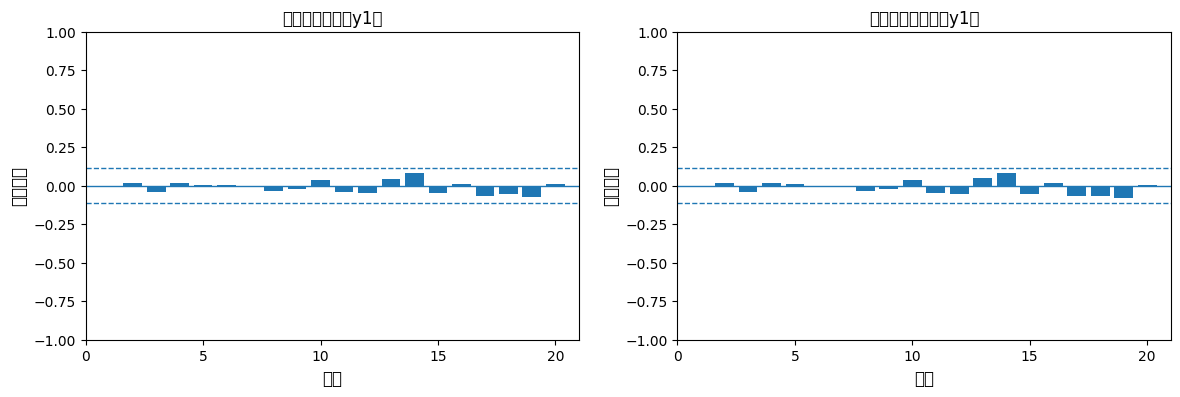

In [23]:
acf_y1=acf(models[3][1].resid, nlags=20)
pacf_y1=pacf(models[3][1].resid, nlags=20)

y=[acf_y1,pacf_y1]
fig,ax=plt.subplots(1,2,figsize=[14,4])
for i in range(2):   
    ax[i].bar(range(1,21),y[i][1:21])
    ax[i].set_xlim(0,21)
    ax[i].set_ylim(-1,1)
    ax[i].set_xticks([0,5,10,15,20])
    ax[i].hlines(0,0,21,linewidth=1)
    ax[i].hlines([1.96/np.sqrt(dt.shape[0]),-1.96/np.sqrt(dt.shape[0])],0,21,linestyles='dashed',linewidth=1)
    ax[i].set_xlabel('ラグ',fontsize=12)
    ax[i].set_ylabel('自己相関',fontsize=12)
ax[0].set_title('標本自己相関（y1）')
ax[1].set_title('偏標本自己相関（y1）')

Text(0.5, 1.0, '偏標本自己相関（y2）')

/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24049 (\N{CJK UNIFIED IDEOGRAPH-5DF1}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/eve

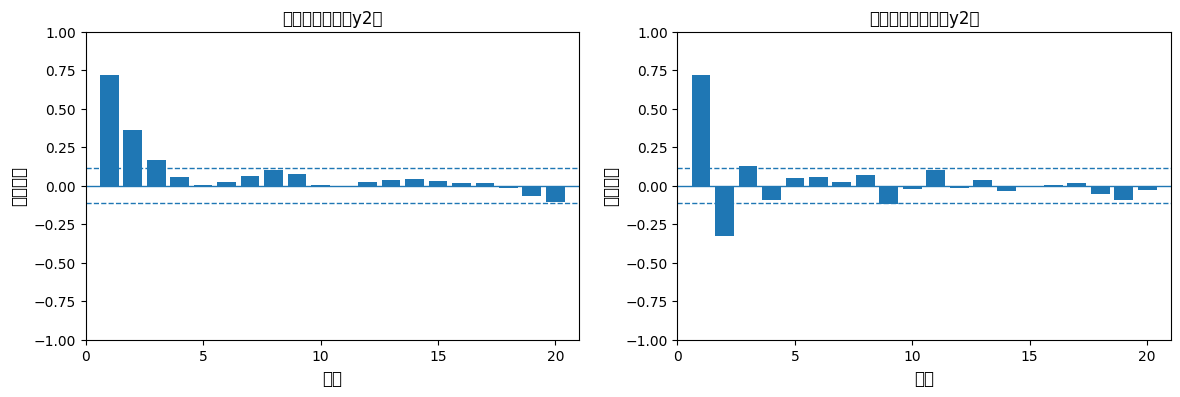

In [26]:
acf_y1=acf(dt['y2'], nlags=20)
pacf_y1=pacf(dt['y2'], nlags=20)

y=[acf_y1,pacf_y1]
fig,ax=plt.subplots(1,2,figsize=[14,4])
for i in range(2):   
    ax[i].bar(range(1,21),y[i][1:21])
    ax[i].set_xlim(0,21)
    ax[i].set_ylim(-1,1)
    ax[i].set_xticks([0,5,10,15,20])
    ax[i].hlines(0,0,21,linewidth=1)
    ax[i].hlines([1.96/np.sqrt(dt.shape[0]),-1.96/np.sqrt(dt.shape[0])],0,21,linestyles='dashed',linewidth=1)
    ax[i].set_xlabel('ラグ',fontsize=12)
    ax[i].set_ylabel('自己相関',fontsize=12)
ax[0].set_title('標本自己相関（y2）')
ax[1].set_title('偏標本自己相関（y2）')

- 上記プロットの結果から、MA(2)、MA(3)が有力で、ARMAの可能性もある
- 季節性が残っているようにも見える
- MA(2)、ARMA(2,1)、ARMA(2,2)、ARMA(2,3)、ARMA(3,1)、ARMA(3,2)、ARMA(3,3)をモデル候補とする（MA(3)、ARMA(1,1)、ARMA(1,2)、ARMA(1,3)は定常性の過程が成り立たないとして却下された）
-

In [30]:
# モデルの定義と推定
models = [
    ('MA(2)', (2, 0, 2)),
    ('ARMA(2,1)', (2, 0, 1)),
    ('ARMA(2,2)', (2, 0, 2)),
    ('ARMA(2,3)', (2, 0, 3)),
    ('ARMA(3,1)', (3, 0, 1)),
    ('ARMA(3,2)', (3, 0, 2)),
    ('ARMA(3,3)', (3, 0, 3))
]

results = []
for name, order in models:

    model = ARIMA(dt['y1'], order=order).fit()
    results.append({
        'Model': name,
        'AIC': model.aic,
        'BIC': model.bic
    })


df_results = pd.DataFrame(results)
df_results = df_results.set_index('Model').T
df_results

Model,MA(2),"ARMA(2,1)","ARMA(2,2)","ARMA(2,3)","ARMA(3,1)","ARMA(3,2)","ARMA(3,3)"
AIC,899.575006,898.477200,899.575006,900.868795,900.080334,895.146751,902.725905
BIC,921.797701,916.996112,921.797701,926.795272,922.303028,921.073228,932.356165


Text(0.5, 1.0, '偏標本自己相関（y3）')

/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24049 (\N{CJK UNIFIED IDEOGRAPH-5DF1}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  func(*args, **kwargs)
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/IPython/core/eve

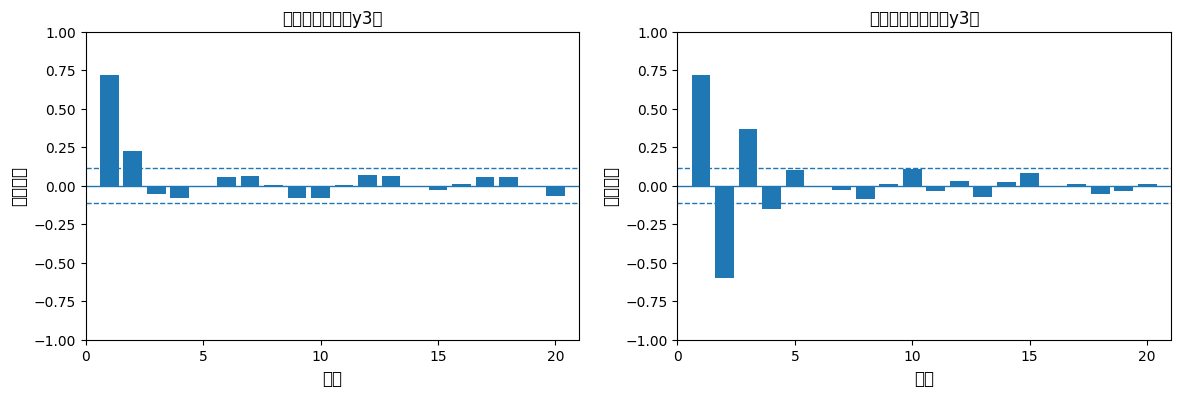

In [31]:
acf_y1=acf(dt['y3'], nlags=20)
pacf_y1=pacf(dt['y3'], nlags=20)

y=[acf_y1,pacf_y1]
fig,ax=plt.subplots(1,2,figsize=[14,4])
for i in range(2):   
    ax[i].bar(range(1,21),y[i][1:21])
    ax[i].set_xlim(0,21)
    ax[i].set_ylim(-1,1)
    ax[i].set_xticks([0,5,10,15,20])
    ax[i].hlines(0,0,21,linewidth=1)
    ax[i].hlines([1.96/np.sqrt(dt.shape[0]),-1.96/np.sqrt(dt.shape[0])],0,21,linestyles='dashed',linewidth=1)
    ax[i].set_xlabel('ラグ',fontsize=12)
    ax[i].set_ylabel('自己相関',fontsize=12)
ax[0].set_title('標本自己相関（y3）')
ax[1].set_title('偏標本自己相関（y3）')

In [34]:
results = []
for p in range(1, 5):
    for q in range(1, 5):
        try:
            model = ARIMA(dt['y3'], order=(p, 0, q)).fit()
            results.append({
                'Model': f'ARMA({p},{q})',
                'AIC': model.aic,
                'BIC': model.bic
            })
        except Exception as e:
            print(f"Error fitting ARMA({p},{q}): {e}")

df_results = pd.DataFrame(results)
df_results = df_results.set_index('Model').T
df_results

/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/KHY/Documents/Anaconda/anaconda3/envs/reasearch_pip/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible start

Model,"ARMA(1,1)","ARMA(1,2)","ARMA(1,3)","ARMA(1,4)","ARMA(2,1)","ARMA(2,2)","ARMA(2,3)","ARMA(2,4)","ARMA(3,1)","ARMA(3,2)","ARMA(3,3)","ARMA(3,4)","ARMA(4,1)","ARMA(4,2)","ARMA(4,3)","ARMA(4,4)"
AIC,910.353593,884.876031,885.223432,886.655970,882.946645,882.892506,884.891672,884.987764,882.964367,884.326767,886.75601,879.734124,884.959663,886.11253,887.904559,886.187036
BIC,925.168723,903.394943,907.446127,912.582447,901.465557,905.115201,910.818149,914.618024,905.187062,910.253244,916.38627,913.068167,910.886141,915.74279,921.238601,923.224861
